**Tuần 1 + 2:** 
- Xây dựng cơ sở lý thuyết, kiến thức nền tảng.
- Chạy mô hình có sẵn yolov8n.pt
---

Các thư viện cài đặt

`pip install ultralytics opencv-python pandas`

In [9]:
# setup syspath
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "../../")))

In [10]:
# lib + model
from ultralytics import YOLO
from utils.path_helper import resolve_path
import cv2
import pandas as pd
import matplotlib.pyplot as plt

model = YOLO(resolve_path('@test_outputs/yolov8n.pt')) 

test output !



image 1/1 D:\Documents\HK2025\project3\traaaa\data\test\crossroads.png: 416x640 29 cars, 12 buss, 1 truck, 60.8ms
Speed: 3.8ms preprocess, 60.8ms inference, 7.1ms postprocess per image at shape (1, 3, 416, 640)


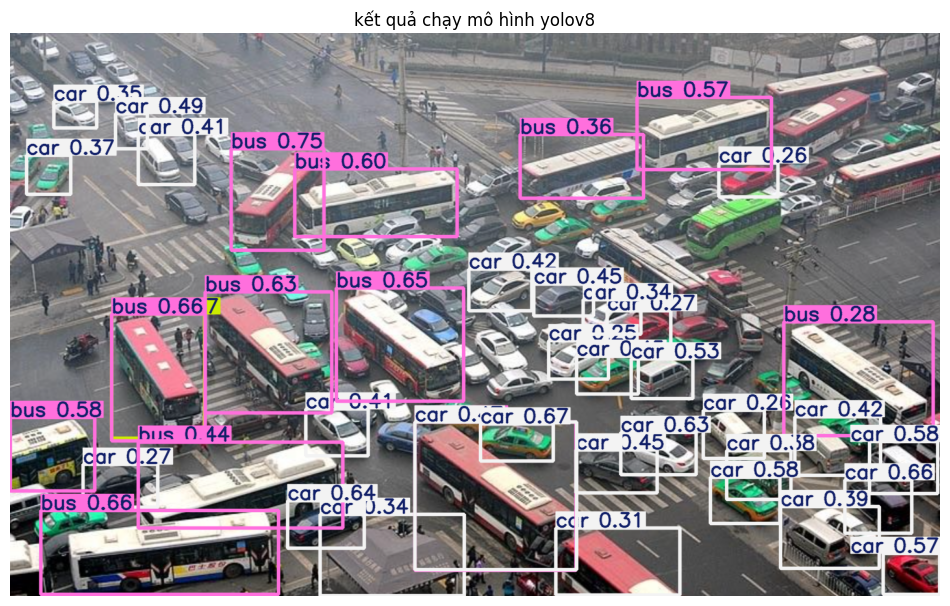

In [5]:
img_path = resolve_path("@data/test/crossroads.png")
results = model(img_path)

# results[0].show()  

result = results[0]
annotated_img = result.plot()  
plt.figure(figsize=(12,8))
plt.imshow(cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("kết quả chạy mô hình yolov8")
plt.show()

# data = result.boxes.data.cpu().numpy()
# print(data) 

In [ ]:
class_names = result.names

df = pd.DataFrame(result.boxes.data.cpu().numpy(), columns=['x1', 'y1', 'x2', 'y2', 'confidence', 'class_id'])
df['class_name'] = df['class_id'].apply(lambda id: class_names[int(id)])

vehicle_classes = ['car', 'motorcycle', 'bus', 'truck'] 
vehicle_df = df[df['class_name'].isin(vehicle_classes)]
stats = vehicle_df['class_name'].value_counts()
if stats.empty:
    print("no stat")
else:
    print(stats)
    print("\nsố phương tiện:", stats.sum())

# if not stats.empty:
#     plt.figure(figsize=(10, 6))
#     stats.plot(kind='bar', color='skyblue', edgecolor='black')
#     plt.title('Thống kê số lượng phương tiện trong ảnh')
#     plt.xlabel('Loại phương tiện')
#     plt.ylabel('Số lượng')
#     plt.xticks(rotation=0)  # Giữ nhãn thẳng để dễ đọc
#     plt.grid(axis='y', linestyle='--', alpha=0.7)
#     plt.tight_layout()
#     plt.show()

--- Theo class ---
class_name
car      29
bus      12
truck     1
Name: count, dtype: int64

số phương tiện: 42


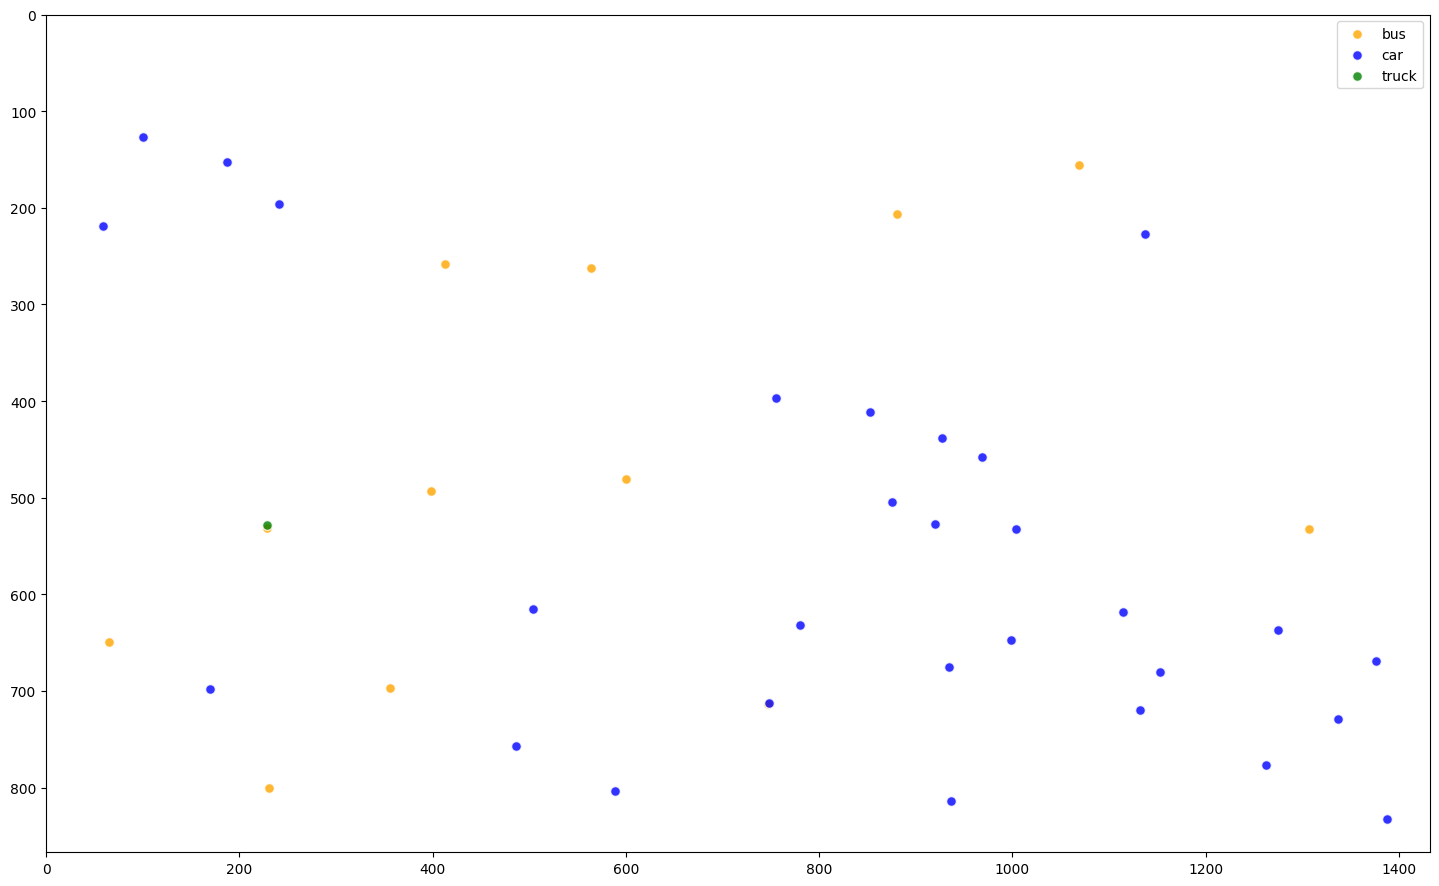

In [ ]:
import cv2
import pandas as pd
img = cv2.imread(str(img_path))

h, w, _ = img.shape

class_names = result.names
df = pd.DataFrame(result.boxes.data.cpu().numpy(), columns=['x1', 'y1', 'x2', 'y2', 'confidence', 'class_id'])
df['class_name'] = df['class_id'].apply(lambda id: class_names[int(id)])

vehicle_classes = ['car', 'motorcycle', 'bus', 'truck',"people"]
vehicle_df = df[df['class_name'].isin(vehicle_classes)].copy()

vehicle_df['center_x'] = (vehicle_df['x1'] + vehicle_df['x2']) / 2
vehicle_df['center_y'] = (vehicle_df['y1'] + vehicle_df['y2']) / 2

color_map = {
    'car': 'blue',
    'truck': 'green',
    'bus': 'orange',
    'motorcycle': 'red'
}

fig, ax = plt.subplots(1, figsize=(w/100, h/100))

for v_class, data in vehicle_df.groupby('class_name'):
    ax.scatter(data['center_x'], data['center_y'], 
               c=color_map.get(v_class, 'black'),
               label=v_class, 
               s=50, 
               alpha=0.8,
               edgecolors='w') 

ax.set_xlim(0, w)
ax.set_ylim(0, h)
ax.invert_yaxis()  
ax.set_aspect('equal', adjustable='box') 
ax.legend(loc='upper right') 

plt.tight_layout(pad=0)
plt.show()  


image 1/1 d:\Documents\HK2025\project3\traaaa\weekly_report\week1_2\image.png: 320x640 1 person, 7 cars, 1 bus, 2 trucks, 1 boat, 60.0ms
Speed: 4.6ms preprocess, 60.0ms inference, 4.4ms postprocess per image at shape (1, 3, 320, 640)


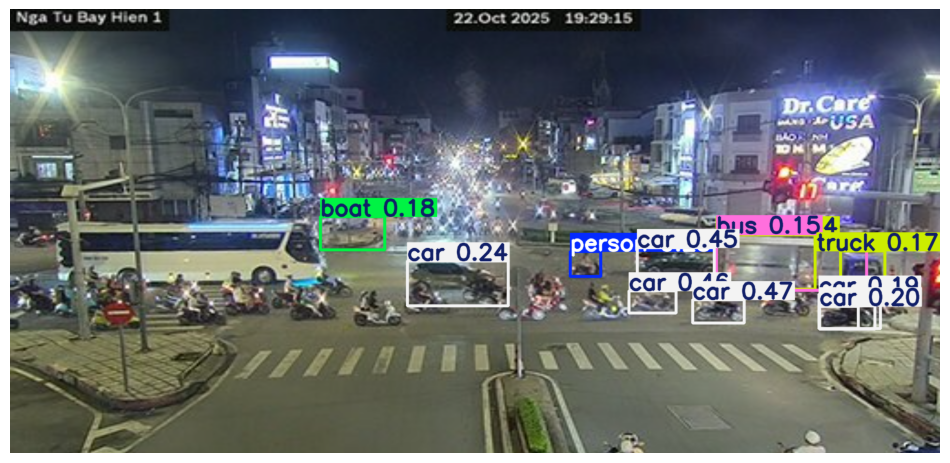

In [18]:
results = model("image.png", conf=0.13)
result = results[0]
annotated_img = result.plot()
plt.figure(figsize=(12,8))
plt.imshow(cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [5]:

import importlib
import utils.path_helper as ph
importlib.reload(ph)

<module 'utils.path_helper' from 'd:\\Documents\\HK2025\\project3\\traaaa\\utils\\path_helper.py'>

In [ ]:
import torch

x = torch.rand(3, 3)
print(x)